In [197]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [198]:
# """
# Created on March 25, 2023

# @author: Josh Goodwill
# """

# import numpy as np
# from scipy.optimize import curve_fit

# '''
# def gen_fit(x, y):
# Generates fit of linear and sqrt portion of IV arrays. Refer to
# data_processing to idenify filtering of IV arrays. scipy.optimize.curve_fit
# used to fit non-linear least squares to fit


# input:
# V_arr (array); Voltage array
# I_arr (array); Current array
# proc* (boolean); Whether to process the arrays for better fitting

# output:
# V_fit (np.array); linear space between min and max voltages from V_arr
# model(t, *popt) (np.array); fitted model of I_arr using Voltage range and 
#                             pointer to popt
# popt(array); optimal values for parameters
#   V_f  (float) = popt[0]; floating potential
#   m1   (float) = popt[1]; slope of linear fit
#   b    (float) = popt[2]; y-intercept of linear fit
#   a    (float) = popt[3]; multiplication factor of exponential fit
#   ne   (float) = popt[4]; electron density [cm^{-3}]
#   etemp(float) = popt[5]; electron temperature [K]
#   VP   (float) = popt[6]; plasma potential [V]
  
# Intial guesses/[bounds]:
#     V_f   = 0.3   ; [0: 0.5]
#     m1    = 100   ; [-1000:1000]
#     b     = 80    ; [-100:100]
#     a     = 5     ; [0:100]
#     ne    = 8*10^8; [0, np.inf]
#     etemp = 1000  ; [0, 10000]
#     VP    = 0.9   ; [0.5, 1.5]

# pcov(2D np.array); covariance of popt array
# '''

# def gen_fit(V_arr, I_arr, proc = False):
#     V_proc = []
#     I_proc = []
#     if proc == True:
#         V_proc, I_proc = data_processing(V_arr, I_arr)
#     else:
#         V_proc, I_proc = V_arr, I_arr
#     guess = [0.3, 0.9, 100, 80,  2,  8*(10**10), 1000]    #intial guess
#     b = ((0, 0.5, -1000,-100, 0, 0, 0),(0.5, 1.5, 1000,100, 100, np.inf,10000)) #bounds

#     # guess = [0.5, 100, 80, 1000, 0.5, 1]    #intial guess
#     # b = ((0, -1000, -100, 0, 0, 0.5),(1, 1000, 100, 10000, 100, 3)) #bounds

#     popt, pcov = curve_fit(model, V_proc, I_proc, guess, bounds = b)
#     # popt, pcov = curve_fit(model, V_proc, I_proc)
#     V_fit = np.linspace(min(V_proc),max(V_proc), num = 300) #Voltage array processed for fit
#     return V_fit, model(V_fit,*popt), popt, pcov

# '''
# def model(V_proc, VP, m1, b, ne, etemp, V0):
# Model to fit ion, *transition*, electron saturation regions

# input:
# V_proc (np.array); processed V_arr for fitting
# Vf (float); floating potential
# m1 (float); slope of linear fit
# b  (float); y-intercept of linear fit
# ne (float); electron density [cm^{-2}]
# etemp(float); electron temperature [K]
# VP (float); plasma potential [V]
# '''

# def model(V_proc, Vf, VP, m1, b, ne, etemp):
#     I_fit = np.zeros(len(V_proc))
#     #Linear fit for ion saturation
#     I_fit[V_proc <= Vf] = lin_fit(V_proc[V_proc <= Vf], m1, b)
#     I1_cont =  -(exp_fit(Vf, ne,  etemp, Vf) + lin_fit(Vf, m1, b))
#     print(I_fit[V_proc == Vf])
#     #Exp fit for transition region
#     I_fit[(V_proc > Vf) & (V_proc <= VP)] = exp_fit(V_proc[(V_proc > Vf) & (V_proc <= VP)], ne, etemp,  Vf) + I1_cont
#     I2_cont = (exp_fit(VP, ne, etemp,  Vf) + I1_cont)
#     #Sqrt fit for electron saturation
#     I_fit[V_proc > VP] = sqrt_fit(V_proc[V_proc > VP], ne, etemp ,VP) + I2_cont
#     return I_fit

# def lin_fit(x, m, y_int): #linear--full model square root
#     return m * x + y_int

# def exp_fit(x, ne, etemp, Vf): #exponential fit
#     q_e = 1.602 * 10**-19 #electron charge [C]
#     K_b = 1.381 * 10**-23 #boltzman constant [m^2*kg/(s^2*K)]   
#     k = q_e / (K_b * etemp) 
#     K_b = 1.381 * 10**-23 #boltzman constant [m^2*kg/(s^2*K)]   
#     m_e = 9.109 * 10**-31 #electron mass [kg]              
#     R = (3./16.) * 2.54 #radius of probe [cm]
#     L = (3.25) * 2.54 #length of probe [cm]
#     A = 2. * np.pi * R * L + np.pi * (R ** 2) #top and length area of cylinder [cm^2]
#     # A = 4 * np.pi * R**2

#     k = q_e / (K_b * etemp)
#     I0 = ne * q_e * np.sqrt(K_b * etemp / (2. * np.pi * m_e)) * A / (10**-9)
#     return I0 * np.exp(k * (x - Vf))

# '''
# def sqrt_fit(x, ne, etemp, V0)
# Uses Eq. 1.4 and 1.5 of https://digitalcommons.usu.edu/etd/274

# input:
# x (np.array); V_proc [V]
# ne (float); electron density [cm?]
# etemp(float); electron temperature [K]
# VP (float); negative plasma potential [V]

# output:
# I (float); current fit [nA]
# '''
# def sqrt_fit(x, ne, etemp, VP):# square root
#     q_e = 1.602 * 10**-19 #electron charge [C]
#     K_b = 1.381 * 10**-23 #boltzman constant [m^2*kg/(s^2*K)]   
#     k = q_e / (K_b * etemp) 
#     K_b = 1.381 * 10**-23 #boltzman constant [m^2*kg/(s^2*K)]   
#     m_e = 9.109 * 10**-31 #electron mass [kg]              
#     # R = 1 #radius of probe [cm?]
#     # A = 4 * np.pi * R**2
#     R = (3./16.) * 2.54 #radius of probe [cm]
#     L = (3.25) * 2.54 #length of probe [cm]
#     A = 2. * np.pi * R * L + np.pi * (R ** 2) #top and length area of cylinder [cm^2]
#     k = q_e / (K_b * etemp)
#     I0 = ne * q_e * np.sqrt(K_b * etemp / (2. * np.pi * m_e)) * A / (10**-9)
#     return I0 * np.sqrt(1. + k*(x - VP))

# '''
# def data_processing(V, I)
# Processes Voltage and Current arrays to reduce points for fitting algorithm.
# Removes Voltage below -3 V and above first max of Current array

# input:
# V (np.array); Normal Voltage array
# I (np.array); Normal Current array

# output:
# V_proc (np.array); processed Voltage array
# I_proc (np.array); processed Current array
# '''

# def data_processing(V, I):
#     Imax = np.argmax(I) #find index of maximum Current
#     if (Imax.size != 1):
#         Vmin_Imax = np.argmin(V[Imax]) #find lowest voltage value with max current
#     else:
#         Vmin_Imax = Imax
#     V_rem = (V > -3) & (V < V[Vmin_Imax]) #array of voltages > -3V and < Vmin_Imax
#     V_proc = V[V_rem]
#     I_proc = I[V_rem]
#     return V_proc, I_proc

In [199]:

def model(x,xa,b,m1,n,t,V0):
    #changed to be hopefully more effeicent
    ret = np.zeros(len(x))
    ret[x <= xa] = seg1(x[x <= xa],m1) - seg1(xa, m1) + b
    ret[x > xa] = seg2(x[x > xa],n,t,V0) - seg2(xa,n,t,V0) + seg1(xa,m1) - seg1(xa, m1) + b
    return ret

def seg1(x,m):#linear--full model square root
    return m * x

def seg2(x,n,t,V0):# square root
    q_e = 1.602 * 10**-19 #C                charge of an electron
    K_b = 1.381 * 10**-23 #m^2*kg/(s^2*K)   boltzman constant
    m_e = 9.109 * 10**-31 #kg               mass of an electron
    R = (3./16.) * 0.0254 #radius of probe
    L = (3.25) * 0.0254 #length of probe
    A = 2. * np.pi * R * L + np.pi * (R ** 2) #area of probe cylinder with out a bottom

    k = q_e / (K_b * t)
    I0 =n * q_e * np.sqrt(K_b * t / (2. * np.pi * m_e)) * A / (10**-9)
    return I0 * np.sqrt(1. + k*(x + V0))

In [290]:
Varr = np.linspace(-6, 6, 1000)
Iarr = model(Varr, 0.5, 4, 10, 6.7e10, 800, 0.5) + np.random.rand(1000) * 500

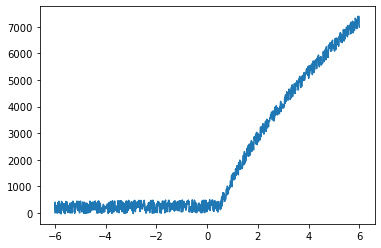

In [291]:
plt.plot(Varr, Iarr)

In [281]:
R = (3./16.) * 2.54 #radius of probe [cm]
L = (3.25) * 2.54 #length of probe [cm]
A = 2. * np.pi * R * L + np.pi * (R**2) #top and length area of cylinder [cm^2]
print(A)

25.414546998483875


In [203]:
R = 1 #radius of probe [cm]
A = 4. * np.pi * R**2 #top and length area of cylinder [cm^2]
print(A)

12.566370614359172
